# Dataset processing

### Import libraries and packages

In [128]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as npb
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder

### Current folder

In [129]:
!ls

01_dataset_processing.ipynb init.ipynb
README.md                   models
dataset                     tmp
images                      venv


### Read dataset as *.csv file

In [130]:
data = pd.read_csv(
    "./dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Dataset shape (Number of instances = 7043. Number of columns = number of features + target value )

In [131]:
data.shape

(7043, 21)

### Sample of the fist 5 raws of dataset

In [132]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### We can drop the column "customerID". 
#### It represents an auto generate ID and it doesn't contain any important information for models and their learning process.


In [133]:
data.drop('customerID', axis='columns',inplace=True)

data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


#### Print all unique values from the columns

In [134]:
for column in data.columns:
    print (f'{column} : {data[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

### The categorical variables 
`We have to pay attention on columns type. The future model won't recognize the meaning of categorical values. So, we can code values with 0 or 1, if column contains just 2 different values. For example, if column contains values "Yes" and "No", we will replace "Yes" with 1 and "No" with 0 for all values in that column. If column contains more than 2 unique values, we can apply "dummy coding" for that kind of columns. For example, if column contains 3 unique values "Month-to-month", "One year", "Two year", after applying "dummy coding" we will have 3 new columns with shape (0/1,0/1,0/1) and old column will be deleted. For example, if instance has "Two year" value in old column, positive value (1) will be set on the new column named "Two year" and the other values of the new columns will be 0.`

`'No internet service' means the same as 'No' in columns "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV" and "StreamingMovies". We can replace the value with "No", so we woudn't apply "dummy coding " at all categorical variables. The same reason is for replacing 'No phone service' with 'No'.`

In [135]:
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service','No',inplace=True)

In [136]:
for column in data.columns:
    print (f'{column} : {data[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


`Now, we can replace values with 1 and 0 in all columns with two unique values.`

In [137]:
#'No' -> 0, 'Yes' -> 1
data.replace({'Partner': {'No': 0, 'Yes': 1},\
              'Dependents': {'No': 0, 'Yes': 1},\
              'PhoneService': {'No': 0, 'Yes': 1},\
              'MultipleLines': {'No': 0, 'Yes': 1},\
              'OnlineSecurity': {'No': 0, 'Yes': 1},\
              'OnlineBackup': {'No': 0, 'Yes': 1},\
              'DeviceProtection': {'No': 0, 'Yes': 1},\
              'TechSupport': {'No': 0, 'Yes': 1},\
              'StreamingTV': {'No': 0, 'Yes': 1},\
              'StreamingMovies': {'No': 0, 'Yes': 1},\
              'PaperlessBilling': {'No': 0, 'Yes': 1},\
              'Churn': {'No': 0, 'Yes': 1},\
              'gender': {'Female': 0, 'Male': 1},\
             }, inplace=True)

In [138]:
for column in data.columns:
    print (f'{column} : {data[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


`We apply "dummy coding" on columns with more than two unique values.`

In [139]:
data.columns.size

20

In [140]:
data1 = pd.get_dummies(data=data, columns=['PaymentMethod', 'Contract', 'InternetService'])

`Before applying "dummy coding" we've had 20 columns and after applying we have 7 more (3 unique values from column "InternetService", 3 from "Contract" and 4 from "PaymentMethod". Summary, we have 10 new columns and 3 old columns were deleted).`

In [141]:
data1.columns.size

27

In [142]:
for column in data1.columns:
    print (f'{column} : {data1[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]


In [143]:
data1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check 

### TotalCharges : object -> float64

`We notice that only column "TotalCharges" has object type. Although, after getting unique values it seems like it isn't.`

In [144]:
data1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [145]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

`"TotalCharges" column has non numeric values. We can convert it all to NaN value with parameter errors='coerce' and then apply isnull() method from pandas library to see all instances with non numeric value at "TotalCharges" column.`

In [158]:
#data1.TotalCharges = pd.to_numeric(data1.TotalCharges)

#ValueError: Unable to parse string " " at position 488

In [147]:
data1['TotalCharges'][pd.to_numeric(data1.TotalCharges, errors='coerce').isnull()]

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [148]:
data1[pd.to_numeric(data1.TotalCharges, errors='coerce').isnull()].shape

(11, 27)

In [149]:
data1.shape

(7043, 27)

`We deleted all instances where column "TotalCharges" is empty string. Number of those instances is 11 and it is a small number compare to number of all instances which is 7043.`

In [150]:
data1 = data1[data1.TotalCharges!=' ']
data1.shape

(7032, 27)

`We convert "TotalCharges" column from object to numeric type.`

In [151]:
data1.TotalCharges = pd.to_numeric(data1.TotalCharges)

In [152]:
data1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [153]:
data1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check 

In [177]:
for column in data1.columns:
    print (f'{column} : {data1[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]


#### We have 1869 customers with positive target value and 5163 with negative target value. The dataset is imbalanced, but it isn't extremely imbalanced.

In [154]:
np.sum(data1['Churn']==1)

1869

In [155]:
np.sum(data1['Churn']==0)

5163

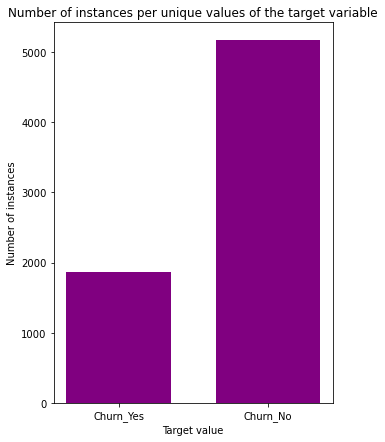

In [176]:
plt.figure(figsize=(5,7))
plt.title("Number of instances per unique values of the target variable")
plt.bar(["Churn_Yes", "Churn_No"],[np.sum(data1['Churn']==1), np.sum(data1['Churn']==0)], width=0.7, color='purple')
plt.ylabel("Number of instances")
plt.xlabel("Target value")
plt.show()

`We can see that it is lower possibility for positive target value for customers with higher tenure value and it is higher possibility for positive target value if customer has low tenure value. This conclusion has sense for politic about loyal and new customers.`

***`Reminder: tenure represents number of months the customer has stayed with the company`***

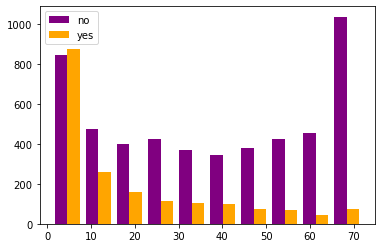

In [184]:
tenure_churn_no = data1[data1.Churn==0].tenure
tenure_churn_yes = data1[data1.Churn==1].tenure

plt.hist([tenure_churn_no, tenure_churn_yes], color=['purple', 'orange'], label=['no','yes'])
plt.legend()
plt.show()

In [156]:
type(data1)

pandas.core.frame.DataFrame

`We can save our processed dataset. We'll use this dataset for learning models.`

In [157]:
from pathlib import Path  
filepath = Path('./dataset/DatasetProcessed.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data1.to_csv(filepath, index_label=False) 